In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### `Popular genres with right join`
- What are the genres of the most popular movies? To answer this question, you need to merge data from the __movies__ and __movie_to_genres__ tables. In a table called __pop_movies__, the top 10 most popular movies in the __movies__ table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the __movie_to_genres__ table using a __right join__. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in __pop_movies__ that column is called __id__, and in __movies_to_genres__ it's called __movie_id__.

- The __pop_movies__ and __movie_to_genres__ tables have been loaded for you.

In [3]:
movie_to_genres = pd.read_pickle('../../datasets/movie_to_genres.p')
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [4]:
pop_movies = pd.read_pickle('../../datasets/movies.p')
pop_movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


#### Quest 4 CH-2
- Merge __movie_to_genres__ and __pop_movies__ using a __right join__. Save the results as __genres_movies__.
- Group __genres_movies__ by __genre__ and count the number of __id__ values.

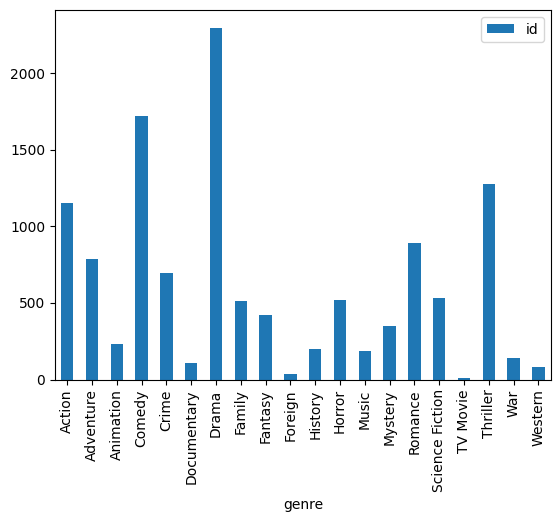

In [5]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()



#### `Using outer join to select actors`
- One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: _Iron Man 1_ and _Iron Man 2_. Most of the actors played in both movies. Use an outer join to find actors who _did not_ act in both movies.

- The Iron Man 1 table is called __iron_1_actors__, and _Iron Man 2_ table is called __iron_2_actors__. Both tables have been loaded for you and a few rows printed so you can see the structure.

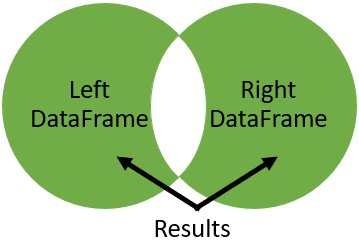

In [6]:
iron_1_actors = pd.read_csv('../../datasets/iron_1_actors.csv')
iron_1_actors.head()

,id,name,character
0,17857,Shaun Toub,Yinsen
1,12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts"
2,1229,Jeff Bridges,Obadiah Stane / Iron Monger
3,18288,Terrence Howard,War Machine
4,57451,Leslie Bibb,Christine Everhart


In [7]:
iron_2_actors = pd.read_csv('../../datasets/iron_2_actors.csv')
iron_2_actors.head()

,character,id,name
0,Ivan Vanko / Whiplash,2295,Mickey Rourke
1,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
2,Justin Hammer,6807,Sam Rockwell
3,Director Nick Fury,2231,Samuel L. Jackson
4,Virginia 'Pepper' Potts,12052,Gwyneth Paltrow


#### Quest 5 CH-2
- Save to __iron_1_and_2__ the merge of __iron_1_actors__ (left) with __iron_2_actors__ tables with an outer join on the __id__ column, and set suffixes to __('_1','_2')__.
- Create an index that returns True if __name_1__ or __name_2__ are null, and __False__ otherwise.

In [8]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                    on='id',
                                    how='outer',
                                    suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
    (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

       id           name_1                  character_1 character_2 name_2
0   17857       Shaun Toub                       Yinsen         NaN    NaN
2    1229     Jeff Bridges  Obadiah Stane / Iron Monger         NaN    NaN
3   18288  Terrence Howard                  War Machine         NaN    NaN
5   57452      Faran Tahir                         Raza         NaN    NaN
8  173810    Sayed Badreya                   Abu Bakaar         NaN    NaN


#### `Self join`
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called __crews__, which has columns __id__, __job__, and __name__. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The __crews__ table has been loaded for you.

In [9]:
crews = pd.read_pickle('../../datasets/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


#### Quest 6 CH-2
To a variable called __crews_self_merged__, merge the __crews__ table to itself on the __id__ column using an __inner join__, setting the __suffixes to '_dir' and '_crew'__ for the left and right tables respectively.

In [10]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes=('_dir','_crew'))
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


#### Quest 6.1 CH-2
Create a Boolean index, named __boolean_filter__, that selects rows from the left table with the job of '__Director__' and avoids rows with the job of '__Director__' in the right table.

In [11]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]
crews_self_merged

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron
...,...,...,...,...,...,...,...
834189,25975,Directing,Director,Jon Gunn,Directing,Director,Brett Winn
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
834191,25975,Directing,Director,Brett Winn,Directing,Director,Brian Herzlinger
834192,25975,Directing,Director,Brett Winn,Directing,Director,Jon Gunn


#### Quest 6.2 CH-2
Use the __.head()__ method to print the first few rows of __direct_crews__.

In [12]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


#### `How does pandas handle self joins?`
Select the false statement about merging a table to itself.

#### Quest 7 CH-2
Select one answer

- You can merge a table to itself with a right join.

- Merging a table to itself can allow you to compare values in a column to other values in the same column.

- `The pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.` This statement is false. pandas treats a merge of a table to itself the same as any other merge. Therefore, it does not limit you from chaining multiple .merge() methods together.

- Merging a table to itself is like working with two separate tables.

#### `Index merge for movie ratings`
To practice merging on indexes, you will merge __movies__ and a table called ratings that holds info about movie __ratings__. Make sure your merge returns all of the rows from the __movies__ table and not all the rows of __ratings__ table need to be included in the result.

The __movies__ and __ratings__ tables have been loaded for you.

In [13]:
movies = pd.read_pickle('../../datasets/movies.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [15]:
ratings = pd.read_pickle('../../datasets/ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


#### Quest 8 CH-2 
- Merge __movies__ and ratings on the index and save to a variable called __movies_ratings__, ensuring that all of the rows from the __movies__ table are returned.

In [16]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())


      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


#### `Do sequels earn more?`
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the __sequels__ and __financials__ tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the __sequels__ table and not all the rows of __financials__ table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The __sequels__ and __financials__ tables have been provided.

In [17]:
financials = pd.read_pickle('../../datasets/financials.p')
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [18]:
sequels = pd.read_pickle('../../datasets/sequels.p')
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


#### Quest 9 CH-2
- With the __sequels__ table __on the left__, merge to it the __financials__ table on index named __id__, ensuring that all the rows from the __sequels__ are returned and some rows from the other table may not be returned, Save the results to __sequels_fin__.
- Merge the __sequels_fin__ table to itself with an inner join, where the left and right tables merge on __sequel__ and __id__ respectively with suffixes equal to __('_org','_seq')__, saving to __orig_seq__.
- Select the __title_org__, __title_seq__, and __diff__ columns of __orig_seq__ and save this as __titles_diff__.
- Sort by __titles_diff__ by __diff__ in __descending order__ and print the first few rows.

In [19]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

In [22]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                            right_on='id', right_index=True,
                            suffixes=('_org', '_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [31]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                            right_on='id', right_index=True,
                            suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]
titles_diff

,title_org,title_seq,diff
1,Toy Story,Saw: The Final Chapter,-237403599.0
30,Harry Potter and the Order of the Phoenix,Focus,-784249775.0
32,The Lord of the Rings: The Two Towers,Cars 2,-366435004.0
44,The Lord of the Rings: The Fellowship of the Ring,"Monsters, Inc.",-308552108.0
55,Harry Potter and the Prisoner of Azkaban,AVP: Alien vs. Predator,-618620691.0
91,Pirates of the Caribbean: The Curse of the Bla...,Spider-Man 2,128755117.0
134,The Empire Strikes Back,Crazy Heart,-498937562.0
154,Shrek,The Last Witch Hunter,-337472308.0
161,Indiana Jones and the Last Crusade,Raiders of the Lost Ark,-84245835.0
168,The Matrix,The Final Destination,-277350244.0


In [37]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                            right_on='id', right_index=True,
                            suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending=False).head())

                                 title_org                 title_seq  \
2929                        Before Sunrise  The Amazing Spider-Man 2   
1256   Star Trek III: The Search for Spock                The Matrix   
293   Indiana Jones and the Temple of Doom              Man of Steel   
1084                                   Saw          Superman Returns   
1334                        The Terminator          Star Trek Beyond   

             diff  
2929  700182027.0  
1256  376517383.0  
293   329845518.0  
1084  287169523.0  
1334  265100616.0  
